# Data Augmentation

Este notebook ha sido creado para el uso de Data augmentation sobre nuestro conjunto de caras. Con el objetivo de aumentar y ofrecer un conjunto más variado de imagenes.

Cargamos las caras:

In [1]:
from sklearn.datasets import fetch_lfw_people

# Importamos mediante una de las dos alternativas
# 1ª alternativa devuelve las imagenes en RGB pero con sus
# respectivos tres valores

faces = fetch_lfw_people(color = True)
positive_patches = faces.images
positive_patches.shape

(13233L, 62L, 47L, 3L)

Realizamos algunos imports necesarios:

In [3]:
%matplotlib inline
from skimage.exposure import rescale_intensity
from skimage import io, data
from skimage.transform import rescale

import matplotlib.pyplot as plt

import sys
sys.path.append("..\\imgaug")        
import imgaug as ia
from imgaug import augmenters as iaa

import numpy as np

from scipy import ndimage, misc

from matplotlib import gridspec

import six
import six.moves as sm

Antes de nada, vamos a realizar una pequeña muestra de los resultados obtenidos con una única imagen.

In [4]:
# Conversiones necesarias
image = positive_patches[1]
image = np.array(image).astype(np.ubyte)

st = lambda aug: iaa.Sometimes(0.5, aug)

seq = iaa.Sequential([
        iaa.Fliplr(0.5),
        iaa.Flipud(0.5),
        st(iaa.Crop(percent=(0, 0.1))),
        st(iaa.GaussianBlur((0, 3.0))),
        st(iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5)),
        st(iaa.Dropout((0.0, 0.1), per_channel=0.5)),
        st(iaa.Add((-10, 10), per_channel=0.5)),
        st(iaa.Multiply((0.5, 1.5), per_channel=0.5)),
        st(iaa.ContrastNormalization((0.5, 2.0), per_channel=0.5)),
        st(iaa.Grayscale(alpha=(0.0, 1.0), name="Grayscale")),
        st(iaa.Affine(
            scale={"x": (0.8, 1.2), "y": (0.8, 1.2)},
            translate_px={"x": (-16, 16), "y": (-16, 16)},
            rotate=(-45, 45),
            shear=(-16, 16),
             order=[0, 1],
             cval=(0, 1.0),
             mode=ia.ALL
         )),
         st(iaa.ElasticTransformation(alpha=(0.5, 3.5), sigma=0.25))
    ],
    random_order=True
)
grid = seq.draw_grid_v2(image, cols=8, rows=8)

Mostramos los resultados:

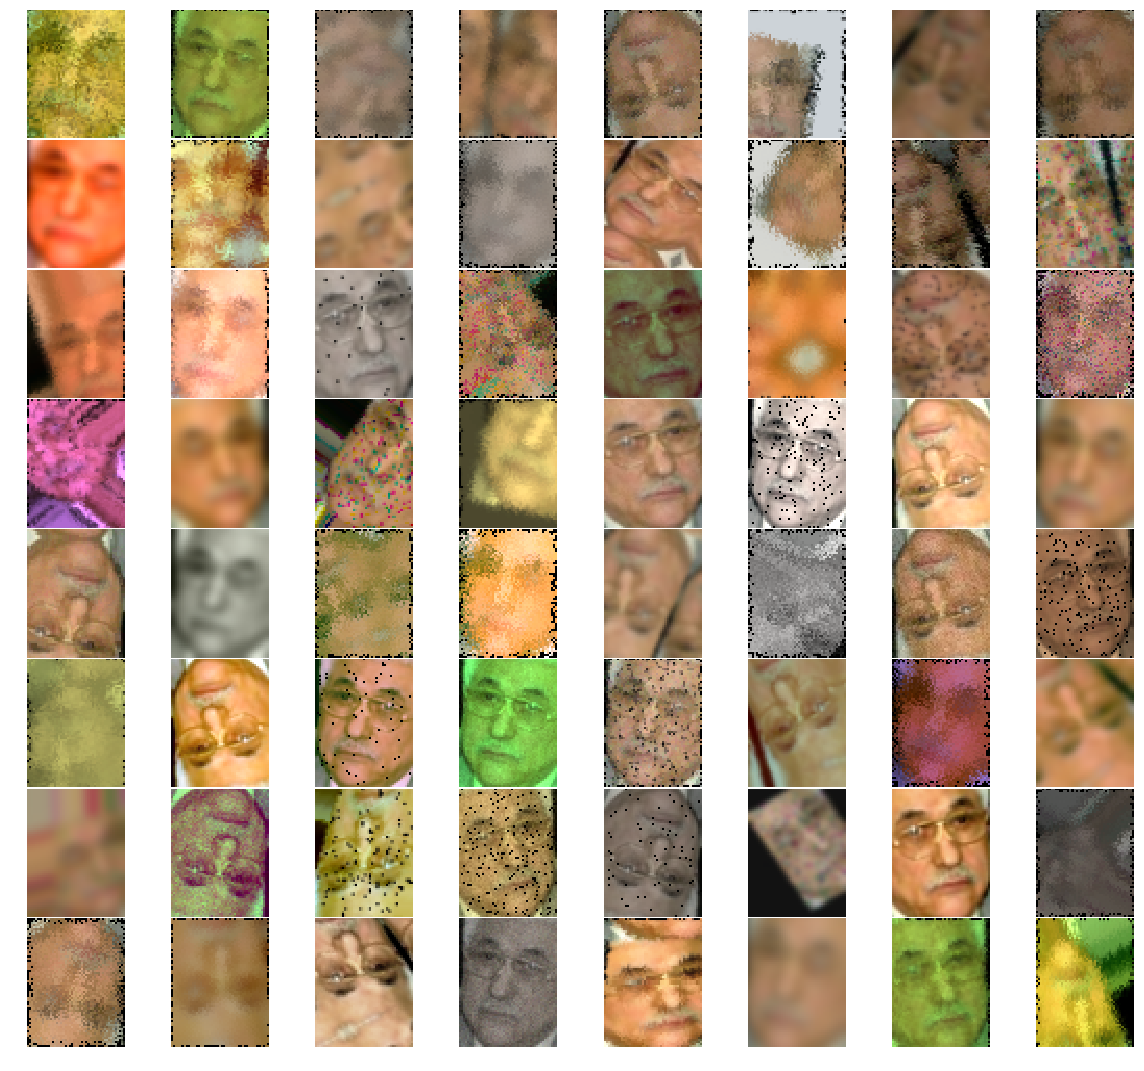

In [5]:
# Mostramos la imagen resultante
fig, axes = plt.subplots(nrows=8, ncols=8, figsize=(16, 16),
                        # sharex=True, sharey=True,
                         #subplot_kw={'adjustable':'box-forced'}
                        )

axes = axes.ravel()

for index in range(len(grid)):
    axes[index].imshow(grid[index])
    axes[index].axis('off');

fig.subplots_adjust(hspace=0.01, wspace=0.01, top=0.9, bottom=0, left=0,right=1)
plt.show()

Una vez, que ya hemos visto un ejemplo sobre una imagen. Procedemos a aplicar la técnica de *Data Augmentation* sobre todo nuestro conjunto de imagenes.

In [1]:
for img_index in range(len(positive_patches)):
    img = positive_patches[img_index]
    # 1º Realizamos las conversiones necesarias
    #    para que todas las imagenes puedan sen procesadas
    img = np.array(img).astype(np.ubyte)
    # 2º Procesamos imagen
    grid = seq.draw_grid_v2(img, cols=8, rows=8)
    # 3º Guardamos imagen
    for j in range(len(grid)):
        io.imsave(".\\imgs\\"+str(img_index)+str(j)+".jpg", grid[j])